## Problem 1

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
from torch import nn

In [1]:
#Rex's Precision Profiler code
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
from torch import nn

from thop import clever_format
from import profile


def complexity_bar_graph(per_layer_complexity_data, file_prefix):
    mac_data = []
    params_data = []
    act_data = []
    dp_data = []
    weight_reuse = []
    input_reuse = []

    for compute_layer in per_layer_complexity_data:
        mac_data.append(compute_layer[1])
        params_data.append(compute_layer[2])
        act_data.append(compute_layer[3])
        dp_data.append(compute_layer[4])
        weight_reuse.append(compute_layer[5])
        input_reuse.append(compute_layer[6])

#     fig = plt.figure(figsize=(20, 10))
#     ax = fig.add_subplot(111)
#     ax.bar(np.arange(len(act_data)) - 0.125, act_data, width=0.25, label='activation')
#     ax.bar(np.arange(len(act_data)) + 0.125, input_reuse, width=0.25, label='data reuse')
#     ax.set_title('number of activation per layer and input reuse factor', fontsize=35)
#     ax.tick_params(axis="x", labelsize=35)
#     ax.tick_params(axis="y", labelsize=35)
#     ax.set_xlabel('layer idx', fontsize=35)
#     ax.set_yscale('log')
#     ax.grid()
#     ax.legend(fontsize=25)
#     plt.savefig(file_prefix + 'act.png')

#     fig = plt.figure(figsize=(20, 10))
#     ax = fig.add_subplot(111)
#     ax.bar(np.arange(len(params_data)) - 0.125, params_data, width=0.25, label='weights')
#     ax.bar(np.arange(len(weight_reuse)) + 0.125, weight_reuse, width=0.25, label='weight reuse')
#     ax.set_yscale('log')
#     ax.set_title('number of weights per layer and weight reuse factor', fontsize=35)
#     ax.tick_params(axis="x", labelsize=35)
#     ax.tick_params(axis="y", labelsize=35)
#     ax.set_xlabel('layer idx', fontsize=35)
#     ax.grid()
#     ax.legend(fontsize=25)
#     plt.savefig(file_prefix + 'weights.png')

#     fig = plt.figure(figsize=(20, 10))
#     ax = fig.add_subplot(111)
#     ax.bar(np.arange(len(dp_data)), dp_data, width=0.5)
#     ax.set_yscale('log')
#     ax.set_title('number of DP per layer', fontsize=35)
#     ax.tick_params(axis="x", labelsize=35)
#     ax.tick_params(axis="y", labelsize=35)
#     ax.set_xlabel('layer idx', fontsize=35)
#     ax.grid()
#     plt.savefig(file_prefix + 'dp.png')

#     fig = plt.figure(figsize=(20, 10))
#     ax = fig.add_subplot(111)
#     ax.bar(np.arange(len(mac_data)), mac_data, width=0.5)
#     ax.set_yscale('log')
#     ax.set_title('number of MAC per layer', fontsize=35)
#     ax.tick_params(axis="x", labelsize=35)
#     ax.tick_params(axis="y", labelsize=35)
#     ax.set_xlabel('layer idx', fontsize=35)
#     ax.grid()
#     plt.savefig(file_prefix + 'mac.png')


def profile_model(model, file_prefix):
    input = torch.randn(1, 3, 224, 224)

    macs, params, num_act, num_dp, per_compute_layer_complexity = profile(model, inputs=(input,))
    storage = clever_format([(num_act + params) * 8 / 8], "%.3f")

    macs, params, num_act, num_dp = clever_format([macs, params, num_act, num_dp], "%.3f")

    print(
        'activations:', num_act,
        'weight:', params,
        'num_dp:', num_dp,
        'macs:', macs
    )

    complexity_bar_graph(per_compute_layer_complexity, file_prefix)



model = torchvision.models.resnet18()
file_prefix = 'resnet18_'
# model = torchvision.models.vgg11()
# file_prefix = 'vgg11_'
# model = torchvision.models.vgg16()
# file_prefix = 'vgg16_'
# model = Net(10)
# file_prefix='alex_cifar_'
profile_model(model, file_prefix)


SyntaxError: invalid syntax (<ipython-input-1-2daec04cffbd>, line 9)

In [5]:
model = torchvision.models.alexnet()
f = open("alexnet.txt",'w')
f.write(str(model))
f.close()

In [11]:
a_net = str(model)
print(a_net)
f = open("alexnet.txt",'r')
alex_layers = []
for line in f:
    text = line.split()
    if len(text)>1 and (("Conv" in text[1])): # or ("Linear" in text[1])):
        #print(line)
        #in_chan, out_chan, k_size, stride
        if "Conv" in text[1]:
            in_chan = int(text[1].split('(')[1][:-1])
            #print(in_chan)
            out_chan = int(text[2][:-1])
            #print(out_chan)
            k_size = int(text[3].split('(')[1][:-1]) #assumes square kernel
            #print(k_size)
            stride =  int(text[5].split('(')[1][:-1])
            #print(stride)
        alex_layers.append([in_chan,out_chan,k_size,stride])
alex_layers.append([9216,4096])
alex_layers.append([4096,4096])
alex_layers.append([4096,1000])

print(len(alex_layers),alex_layers)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [15]:
input_bytes = 0
img_size = 224*224
weight_bytes = 0
for l in alex_layers:
        if len(l)==4: 
            #convolutional layer
            in_chan, out_chan, k_size, stride = l
            input_bytes += in_chan * img_size
            weight_bytes += in_chan * k_size * k_size * out_chan
        else:
            #linear layer
            numrows, numcols = l
            input_bytes += numcols
            weight_bytes += numcols * numrows
print("Input Bytes:", input_bytes,"Weight Bytes:",weight_bytes, "Total Read Bytes:",input_bytes+weight_bytes)

Input Bytes: 45117416 Weight Bytes: 61090496 Total Read Bytes: 106207912


In [35]:
y = []
x = []
for beta in np.arange(1,10,.01):
    x.append(beta)
    y.append(0.00158708444 + 0.1976736/beta + 16.9932659/beta)
    

Text(0.5,0,'$\\beta$')

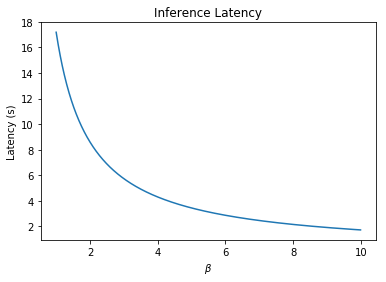

In [50]:
plt.figure()
plt.plot(x,y)
plt.title("Inference Latency")
plt.ylabel("Latency (s)")
plt.xlabel(r'$\beta$')

Text(0,0.5,'Energy per Decision (J/dec)')

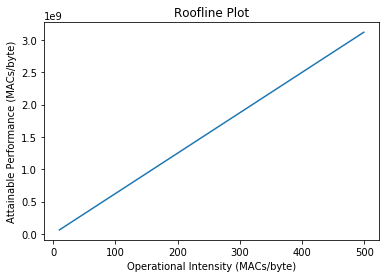

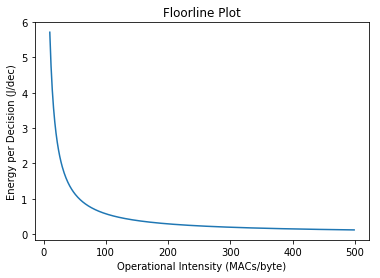

In [98]:
# 1.6
OIs = np.arange(10,100000,1)
OIs = np.arange(10,500,1)

PP = 450 * 10**9 #MAC latency (MACs/sec)
BW = 50 * 10**6 / 8 #reading latency (byte/sec)
CI = 714188000 # number of MACs
Em = 80 * 10**-9 # energy for read (J/byte)
Ep = .5 * 10**-12 #energy for a MAC (J/MAC)
APs =[]
Edecs=[]
for oi in OIs:
    APs.append(min(PP, oi * BW))
    Edecs.append(CI * (Ep + Em / oi))
    
plt.figure()
plt.plot(OIs,APs)
plt.title("Roofline Plot")
plt.xlabel("Operational Intensity (MACs/byte)")
plt.ylabel("Attainable Performance (MACs/byte)")

plt.figure()
plt.plot(OIs,Edecs)
plt.title("Floorline Plot")
plt.xlabel("Operational Intensity (MACs/byte)")
plt.ylabel("Energy per Decision (J/dec)")

In [90]:
print(Edecs[10000])

0.0060705922865017135
